# CodeClause Artificial Intelligence Intern

# Name: Tarush Kumar Goyal

# Task 1: House Price Prediction

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier

### Importing Dataset

In [2]:
data = pd.read_csv("Housepurchase.csv")
df=pd.DataFrame(data)

In [3]:
data

,Country,Age,Salary,House Purchased
0,India,34.0,92000.0,Yes
1,Srilanka,22.0,25000.0,Yes
2,China,31.0,74000.0,Yes
3,Srilanka,29.0,NaN,No
4,China,55.0,98000.0,Yes
5,India,24.0,30000.0,No
6,Srilanka,28.0,40000.0,No
7,India,NaN,60000.0,Nan
8,China,51.0,89000.0,Yes
9,India,44.0,78000.0,Yes


### Exploratory Data Analysis [EDA]

In [4]:
df.shape

(24, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          24 non-null     object 
 1   Age              22 non-null     float64
 2   Salary           22 non-null     float64
 3   House Purchased  23 non-null     object 
dtypes: float64(2), object(2)
memory usage: 896.0+ bytes


In [6]:
df.dropna(axis=0, inplace=True)
df.replace("china", "China", inplace=True)
df

,Country,Age,Salary,House Purchased
0,India,34.0,92000.0,Yes
1,Srilanka,22.0,25000.0,Yes
2,China,31.0,74000.0,Yes
4,China,55.0,98000.0,Yes
5,India,24.0,30000.0,No
6,Srilanka,28.0,40000.0,No
8,China,51.0,89000.0,Yes
9,India,44.0,78000.0,Yes
10,China,21.0,20000.0,No
11,Srilanka,25.0,30000.0,Yes


### Label Encoding

In [7]:
df.replace("China",0,inplace=True)
df.replace("India",1,inplace=True)
df.replace("Srilanka",2,inplace=True)
df

,Country,Age,Salary,House Purchased
0,1,34.0,92000.0,Yes
1,2,22.0,25000.0,Yes
2,0,31.0,74000.0,Yes
4,0,55.0,98000.0,Yes
5,1,24.0,30000.0,No
6,2,28.0,40000.0,No
8,0,51.0,89000.0,Yes
9,1,44.0,78000.0,Yes
10,0,21.0,20000.0,No
11,2,25.0,30000.0,Yes


In [8]:
df.replace("No",0,inplace=True)
df.replace("Yes",1,inplace=True)
df

,Country,Age,Salary,House Purchased
0,1,34.0,92000.0,1
1,2,22.0,25000.0,1
2,0,31.0,74000.0,1
4,0,55.0,98000.0,1
5,1,24.0,30000.0,0
6,2,28.0,40000.0,0
8,0,51.0,89000.0,1
9,1,44.0,78000.0,1
10,0,21.0,20000.0,0
11,2,25.0,30000.0,1


### Correlation

In [9]:
correlation = df.corr()
correlation

,Country,Age,Salary,House Purchased
Country,1.000000,-0.447380,-0.398765,-0.008209
Age,-0.447380,1.000000,0.748095,0.371081
Salary,-0.398765,0.748095,1.000000,0.330881
House Purchased,-0.008209,0.371081,0.330881,1.000000


<Axes: >

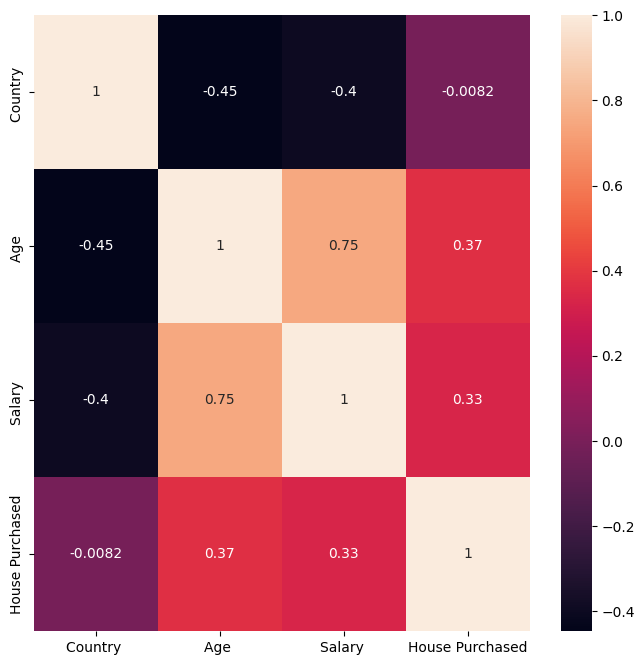

In [10]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,annot=True)

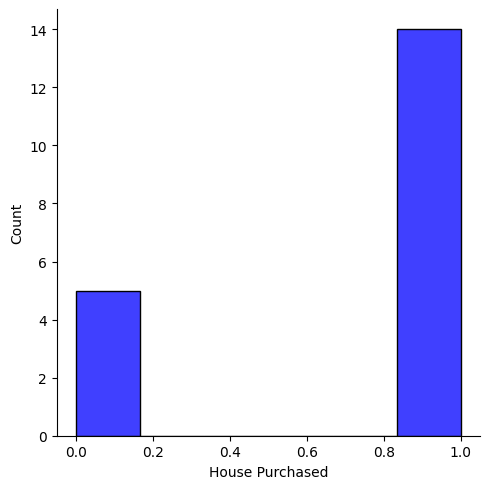

In [11]:
sns.displot(df['House Purchased'],color="b")

In [12]:
x= df.iloc[:, [0,1,2]].values  
x

array([[1.0e+00, 3.4e+01, 9.2e+04],
       [2.0e+00, 2.2e+01, 2.5e+04],
       [0.0e+00, 3.1e+01, 7.4e+04],
       [0.0e+00, 5.5e+01, 9.8e+04],
       [1.0e+00, 2.4e+01, 3.0e+04],
       [2.0e+00, 2.8e+01, 4.0e+04],
       [0.0e+00, 5.1e+01, 8.9e+04],
       [1.0e+00, 4.4e+01, 7.8e+04],
       [0.0e+00, 2.1e+01, 2.0e+04],
       [2.0e+00, 2.5e+01, 3.0e+04],
       [0.0e+00, 3.3e+01, 4.5e+04],
       [1.0e+00, 4.2e+01, 6.5e+04],
       [1.0e+00, 3.3e+01, 2.2e+04],
       [1.0e+00, 2.5e+01, 6.0e+04],
       [0.0e+00, 2.7e+01, 5.0e+04],
       [0.0e+00, 5.2e+01, 6.7e+04],
       [1.0e+00, 4.8e+01, 8.0e+04],
       [2.0e+00, 2.8e+01, 3.0e+04],
       [0.0e+00, 4.3e+01, 4.5e+04]])

In [13]:
y= df.iloc[:, 3].values 
y 

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1])

### Train-Test-Split

In [14]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  

In [15]:
x_train

array([[1.0e+00, 4.8e+01, 8.0e+04],
       [0.0e+00, 5.1e+01, 8.9e+04],
       [1.0e+00, 2.4e+01, 3.0e+04],
       [0.0e+00, 3.1e+01, 7.4e+04],
       [2.0e+00, 2.8e+01, 4.0e+04],
       [1.0e+00, 2.5e+01, 6.0e+04],
       [2.0e+00, 2.5e+01, 3.0e+04],
       [1.0e+00, 4.4e+01, 7.8e+04],
       [2.0e+00, 2.8e+01, 3.0e+04],
       [1.0e+00, 4.2e+01, 6.5e+04],
       [0.0e+00, 5.5e+01, 9.8e+04],
       [1.0e+00, 3.4e+01, 9.2e+04],
       [0.0e+00, 5.2e+01, 6.7e+04],
       [1.0e+00, 3.3e+01, 2.2e+04]])

In [16]:
y_train

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [17]:
x_test

array([[0.0e+00, 3.3e+01, 4.5e+04],
       [2.0e+00, 2.2e+01, 2.5e+04],
       [0.0e+00, 2.1e+01, 2.0e+04],
       [0.0e+00, 4.3e+01, 4.5e+04],
       [0.0e+00, 2.7e+01, 5.0e+04]])

In [18]:
y_test

array([1, 1, 0, 1, 0])

In [19]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)    

### K Neighbors Classifier

In [20]:
knn = KNeighborsClassifier()

In [21]:
a= knn.fit(x_train, y_train)  
a

KNeighborsClassifier()

In [22]:
y_pred= knn.predict(x_test)  
y_pred

array([1, 1, 1, 1, 1])

### Confusion Matrix

In [23]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
cm

array([[0, 2],
       [0, 3]])

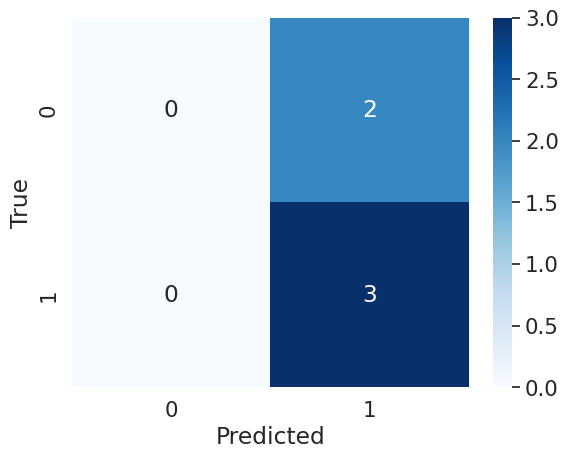

In [24]:
sns.set(font_scale=1.4) 
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Random Forest Model

In [25]:
rf = RandomForestRegressor(n_estimators=100)

In [26]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [27]:
y_pred = rf.predict(x_test)
y_pred

array([0.51, 0.34, 0.34, 0.38, 0.57])

In [28]:
accuracy = metrics.r2_score(y_test, y_pred)
print('R-Squared Error for rf :', accuracy)

R-Squared Error for rf : -0.2504999999999997
